In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
sfr = pd.read_csv('../data/mag/armls_sf_medrent_puma.csv')

In [3]:
sfr.columns

Index(['geoid', 'puma', 'b1_19', 'b2_19', 'b3_19', 'b4_19', 'b1_20', 'b2_20',
       'b3_20', 'b4_20', 'b1_21', 'b2_21', 'b3_21', 'b4_21', 'b1_22', 'b2_22',
       'b3_22', 'b4_22', 'b1_1922', 'b2_1922', 'b3_1922', 'b4_1922',
       'b1p_1922', 'b2p_1922', 'b3p_1922', 'b4p_1922'],
      dtype='object')

## Map prices

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
geo.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475..."
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874..."


In [6]:
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)

In [7]:
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')

In [8]:
lightrail = gpd.read_file('../data/geo/shapefiles/light_rail.geojson')
lightrail = lightrail.to_crs(4269)

### join data to geo files
# check 2020 / 2010 PUMA boundary

In [9]:
sfr = pd.merge(geo,sfr,how='left',left_on='joinid',right_on='geoid')

In [10]:
sfr.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,puma,b1_19,b2_19,b3_19,b4_19,b1_20,b2_20,b3_20,b4_20,b1_21,b2_21,b3_21,b4_21,b1_22,b2_22,b3_22,b4_22,b1_1922,b2_1922,b3_1922,b4_1922,b1p_1922,b2p_1922,b3p_1922,b4p_1922
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,Phoenix (Far North) & Peoria (Northwest) Citie...,1200.0,1450,1650.0,2095.0,987.5,1495,1750,2195.0,1452.5,1725.0,2200.0,2590.0,NaN,1997.5,2430,2895.0,0.0,373.5,582.0,548.6,0.000000,0.229988,0.314935,0.233805
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,"Maricopa County--Scottsdale (North), Phoenix (...",1195.0,1895,2400.0,3250.0,1250.0,1900,2550,3425.0,1595.0,2350.0,3000.0,4000.0,1800.0,2700.0,3500,4447.5,461.6,577.6,812.0,807.5,0.344889,0.272145,0.302083,0.221841


In [11]:
sfr = sfr[['geometry','geoid','b1_22', 'b2_22','b3_22', 'b4_22','b1_1922',\
           'b2_1922', 'b3_1922', 'b4_1922',\
           'b1p_1922', 'b2p_1922', 'b3p_1922', 'b4p_1922']]

In [12]:
sfr.describe()

,geoid,b1_22,b2_22,b3_22,b4_22,b1_1922,b2_1922,b3_1922,b4_1922,b1p_1922,b2p_1922,b3p_1922,b4p_1922
count,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,400119.466667,1327.464286,1765.966667,2376.400000,2959.300000,224.358667,347.374667,525.973333,604.761333,0.225945,0.248341,0.288899,0.268919
std,5.235411,267.531268,366.944549,435.078449,803.370685,252.241083,110.357199,97.719946,195.120254,0.267973,0.068444,0.048359,0.089054
min,400112.000000,975.000000,1295.000000,1797.000000,2097.500000,-188.680000,170.000000,432.600000,344.000000,-0.162141,0.101190,0.207386,0.147959
25%,400115.500000,1104.375000,1586.000000,2130.000000,2393.500000,122.000000,290.750000,461.300000,512.300000,0.101023,0.216259,0.255008,0.223462
50%,400119.000000,1287.250000,1695.000000,2250.000000,2720.000000,174.000000,301.000000,500.800000,548.600000,0.147959,0.246280,0.282051,0.249345
75%,400122.500000,1558.625000,1923.750000,2465.000000,3122.500000,358.680000,404.750000,553.500000,669.300000,0.294469,0.281626,0.313796,0.296671
max,400129.000000,1800.000000,2700.000000,3500.000000,4500.000000,779.000000,577.600000,812.000000,1173.500000,0.869420,0.407211,0.389147,0.445767


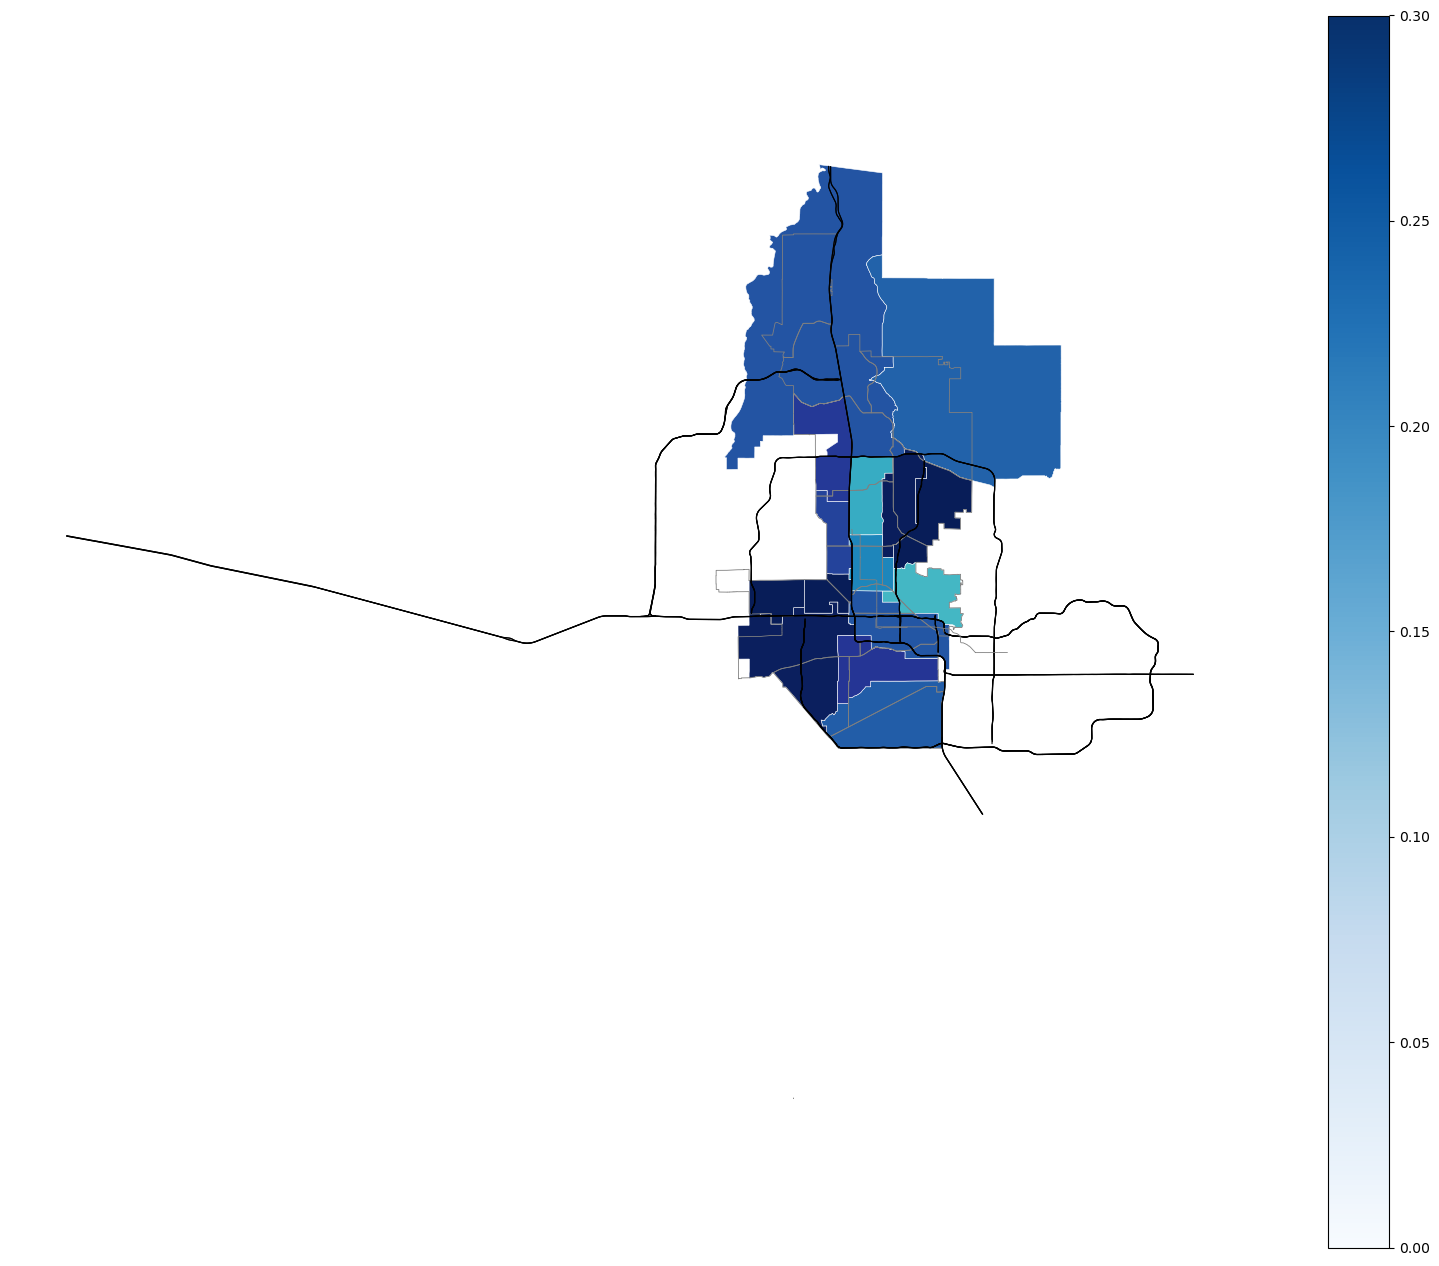

In [13]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0,vmax=0.3)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
sfr.plot(column = 'b4p_1922', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.6)
road.plot(ax=ax,color='black',edgecolor='none',linewidth=0.75)
lightrail.plot(ax=ax,color='gray',edgecolor='none',linewidth=0.6)
fig.colorbar(sm)
#ax.set_title(f'Median Price {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
#             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')

In [ ]:
plt.savefig(f'output/test/{month}.jpg', dpi = 400) # saving each scatter plot by month

In [ ]:
def price_maps(gdf,month):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=0,vmax=1000000)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
    sm.set_array([])
    fig.colorbar(sm)
    gdf.plot(column = 'value', cmap='Blues', norm=new_norm, edgecolor="face", linewidth=0.4, ax = ax)
    ax.set_title(f'Median Price {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
   #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Price/{month}.jpg', dpi = 400) # saving each scatter plot by month